<a href="https://colab.research.google.com/github/likeshd/time_series_models_libraries/blob/main/metro_traffic_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Prophet Model,Compare Forecast to Actuals,Adding Regressor,Adding more regressors,Optimizing the model.


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error


import datetime
from datetime import date
import random


import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import Data
data = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv', infer_datetime_format=True)
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [6]:
data['date_time'] =  pd.to_datetime(data['date_time'], format='%Y-%m-%d %H:%M:%S')

In [7]:
data = data.set_index(pd.DatetimeIndex(data['date_time'])).rename(columns={"date_time": "ds"}).drop_duplicates(subset=['ds'])

In [8]:
ts = data['2018-06-30':'2018-09-29']
ts.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,ds,traffic_volume
date_time,,,,,,,,,
2018-06-30 00:00:00,NaN,302.87,0.0,0.0,1,Clear,sky is clear,2018-06-30 00:00:00,1423
2018-06-30 01:00:00,NaN,302.58,0.0,0.0,1,Clear,sky is clear,2018-06-30 01:00:00,869
2018-06-30 02:00:00,NaN,302.55,0.0,0.0,1,Thunderstorm,proximity thunderstorm,2018-06-30 02:00:00,617
2018-06-30 03:00:00,NaN,302.29,0.0,0.0,40,Rain,moderate rain,2018-06-30 03:00:00,429
2018-06-30 04:00:00,NaN,301.29,0.0,0.0,1,Rain,light rain,2018-06-30 04:00:00,429


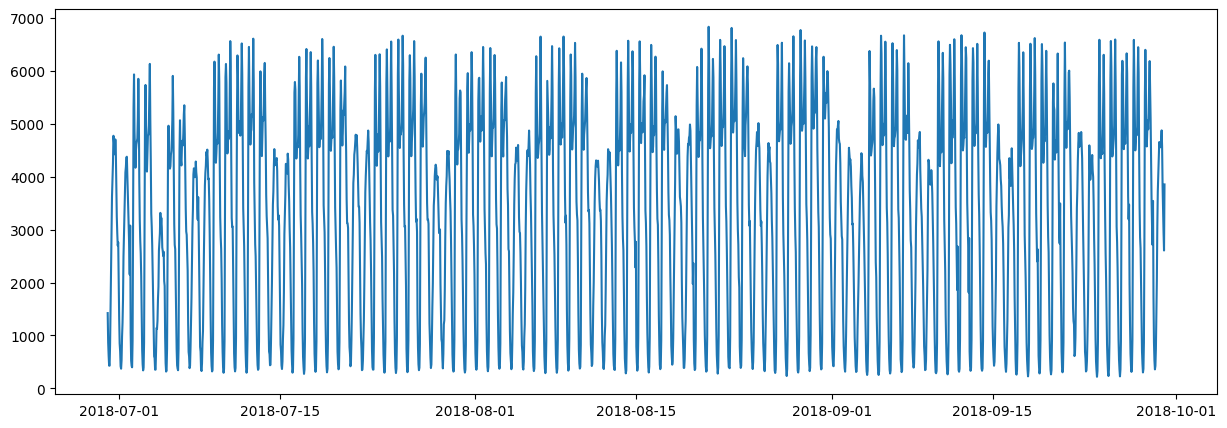

In [9]:
plt.figure(figsize=(15,5))
plt.plot(ts.traffic_volume)
plt.show()

In [10]:
split_date = '2018-09-22'
ts_train = ts.loc[ts.index <= split_date].copy()
ts_test = ts.loc[ts.index > split_date].copy()

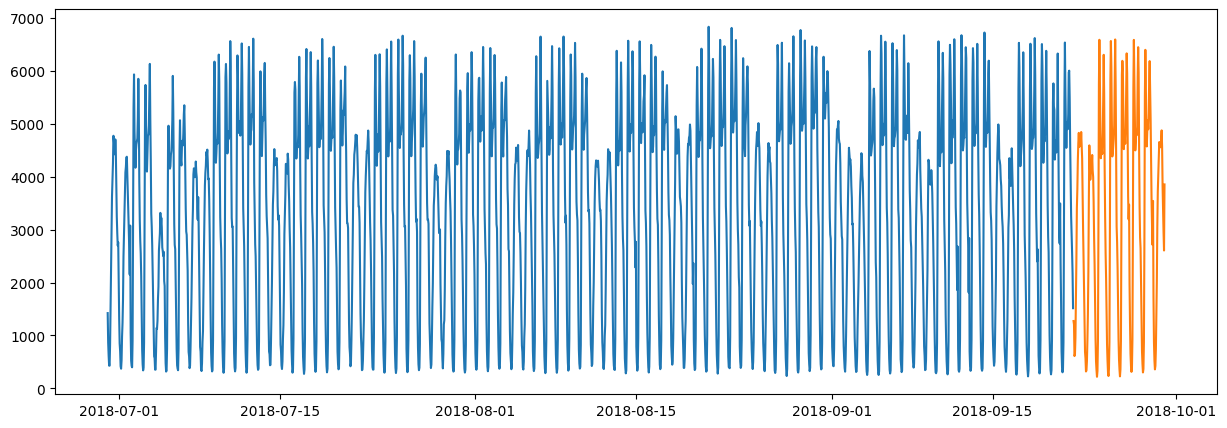

In [11]:
plt.figure(figsize=(15,5))
plt.plot(ts_train.traffic_volume)
plt.plot(ts_test.traffic_volume)
plt.show()

## Simple Prophet Model


In [12]:
ts_train = ts_train.rename(columns={'traffic_volume':'y'})
ts_test = ts_test.rename(columns={'traffic_volume':'y'})

In [13]:
%%time
# Setup and train model
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)

model.fit(ts_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o7vltkr/sh7taw9j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o7vltkr/btt_0uer.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15598', 'data', 'file=/tmp/tmp0o7vltkr/sh7taw9j.json', 'init=/tmp/tmp0o7vltkr/btt_0uer.json', 'output', 'file=/tmp/tmp0o7vltkr/prophet_model82ooyr8s/prophet_model-20240408113322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:33:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:33:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 670 ms, sys: 49 ms, total: 719 ms
Wall time: 1.19 s


In [14]:
%%time
# Predict on training set with model
y_pred = model.predict(df=ts_test)

CPU times: user 141 ms, sys: 1.38 ms, total: 143 ms
Wall time: 163 ms


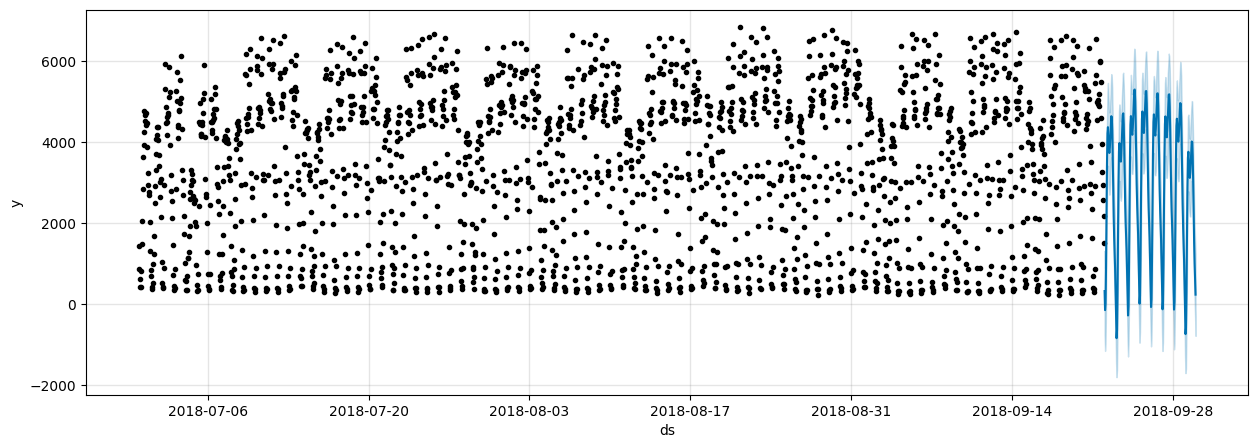

In [15]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(y_pred, ax=ax)

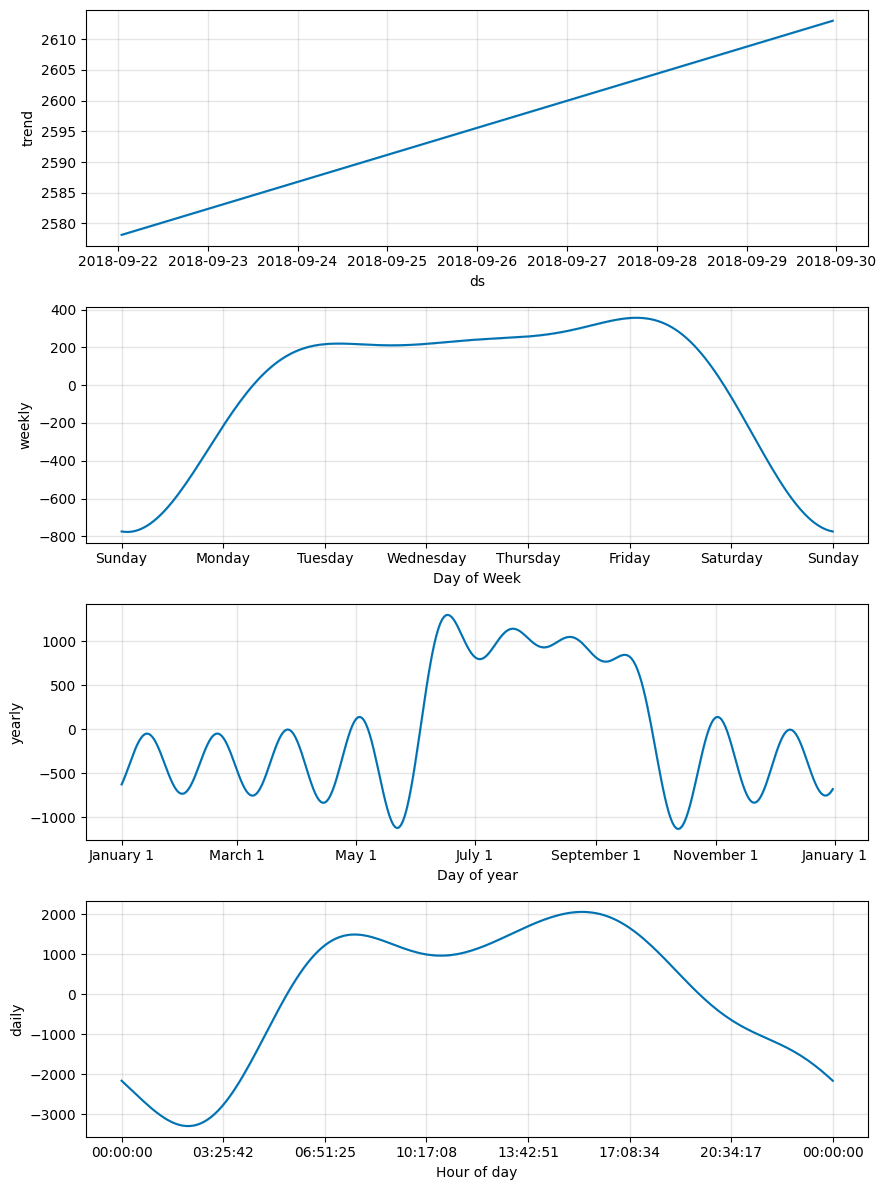

In [16]:
# Plot the components
fig = model.plot_components(y_pred)

## Compare Forecast to Actuals

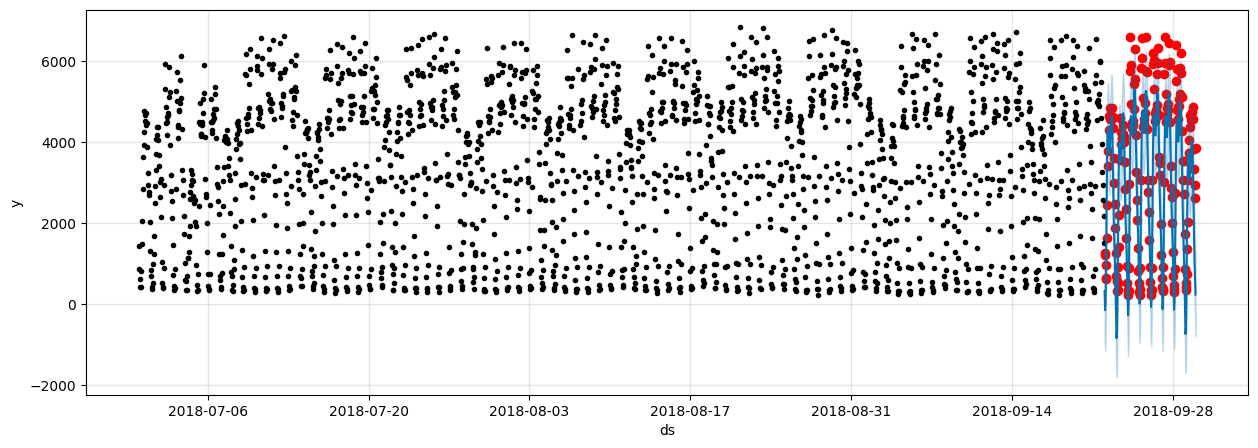

In [17]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig = model.plot(y_pred, ax=ax)

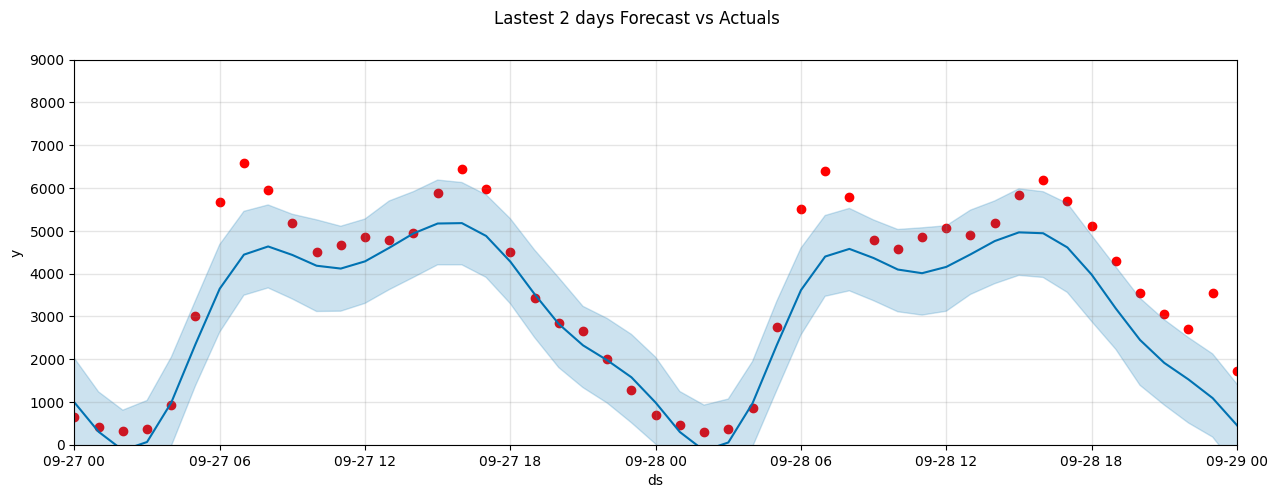

In [18]:
# Lastest 2 days

# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig = model.plot(y_pred, ax=ax)
ax.set_xbound(lower= datetime.date(2018,9,27), upper=datetime.date(2018,9,29))

ax.set_ylim(0, 9000)
plot = plt.suptitle('Lastest 2 days Forecast vs Actuals')

In [19]:
# **Error Metrics**

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
def error_metrics(y_true, y_pred):
    print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_true, y_pred)))
    print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_true, y_pred))))
    print('Mean Absolute percentage Error: {:.2f} %'.format(mean_absolute_percentage_error(y_true, y_pred)))

In [21]:
error_metrics(ts_test.y, y_pred['yhat'])

Mean Absolute Error: 755.65
Root Mean Squared Error: 985.93
Mean Absolute percentage Error: 40.36 %


## Adding Regressor

In [22]:
%%time
# Setup and train model with holidays
model_with_temp = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model_with_temp.add_regressor('temp')
model_with_temp.fit(df=ts_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o7vltkr/smdohpos.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o7vltkr/_m25i4ug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8751', 'data', 'file=/tmp/tmp0o7vltkr/smdohpos.json', 'init=/tmp/tmp0o7vltkr/_m25i4ug.json', 'output', 'file=/tmp/tmp0o7vltkr/prophet_modelh_kddz4i/prophet_model-20240408113645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:36:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:36:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 240 ms, sys: 11.3 ms, total: 251 ms
Wall time: 359 ms


In [23]:
%%time
y_pred_1r = model_with_temp.predict(df=ts_test)

CPU times: user 153 ms, sys: 0 ns, total: 153 ms
Wall time: 321 ms


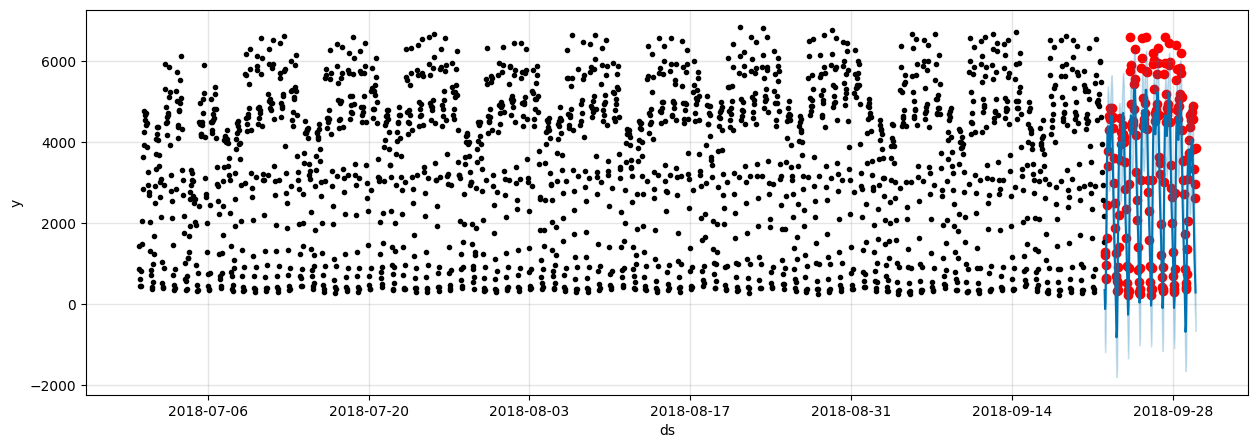

In [24]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig2 = model_with_temp.plot(y_pred_1r, ax=ax)

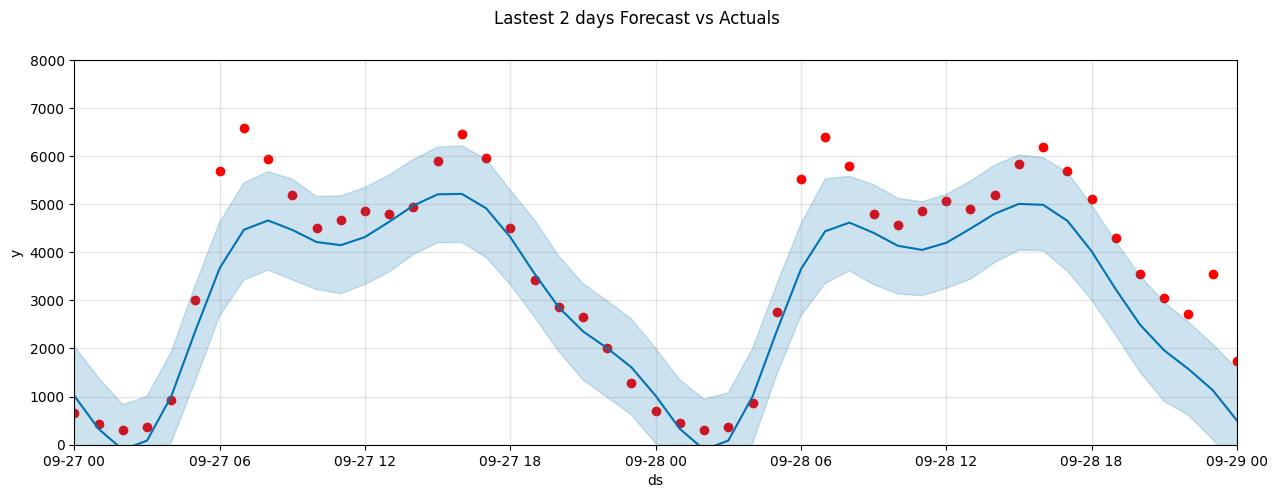

In [25]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig = model.plot(y_pred_1r, ax=ax)
#ax.set_xbound(lower='2018-09-22', upper='2018-09-29')
#ax.set_xbound(lower='2012-10-02 09:00:00', upper='2018-30-29 09:00:00')
ax.set_xbound(lower= datetime.date(2018,9,27), upper=datetime.date(2018,9,29))

ax.set_ylim(0, 8000)
plot = plt.suptitle('Lastest 2 days Forecast vs Actuals')

In [26]:
# **Error Metrics**

error_metrics(ts_test.y, y_pred_1r['yhat'])

Mean Absolute Error: 742.35
Root Mean Squared Error: 970.90
Mean Absolute percentage Error: 39.70 %


In [27]:
## Adding more regressors

%%time
# Setup and train model with many regressors
model_reg = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model_reg.add_regressor('temp')
model_reg.add_regressor('rain_1h')
model_reg.add_regressor('snow_1h')
model_reg.add_regressor('clouds_all')
model_reg.fit(df=ts_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o7vltkr/23wc23lc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o7vltkr/irh698np.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98207', 'data', 'file=/tmp/tmp0o7vltkr/23wc23lc.json', 'init=/tmp/tmp0o7vltkr/irh698np.json', 'output', 'file=/tmp/tmp0o7vltkr/prophet_model36w0wy8m/prophet_model-20240408113825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:38:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:38:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 260 ms, sys: 9.87 ms, total: 270 ms
Wall time: 395 ms


In [28]:
%%time
y_pred_mr = model_reg.predict(df=ts_test)
y_pred_mr.yhat[y_pred_mr.yhat < 0] = 0

CPU times: user 106 ms, sys: 1.65 ms, total: 108 ms
Wall time: 108 ms


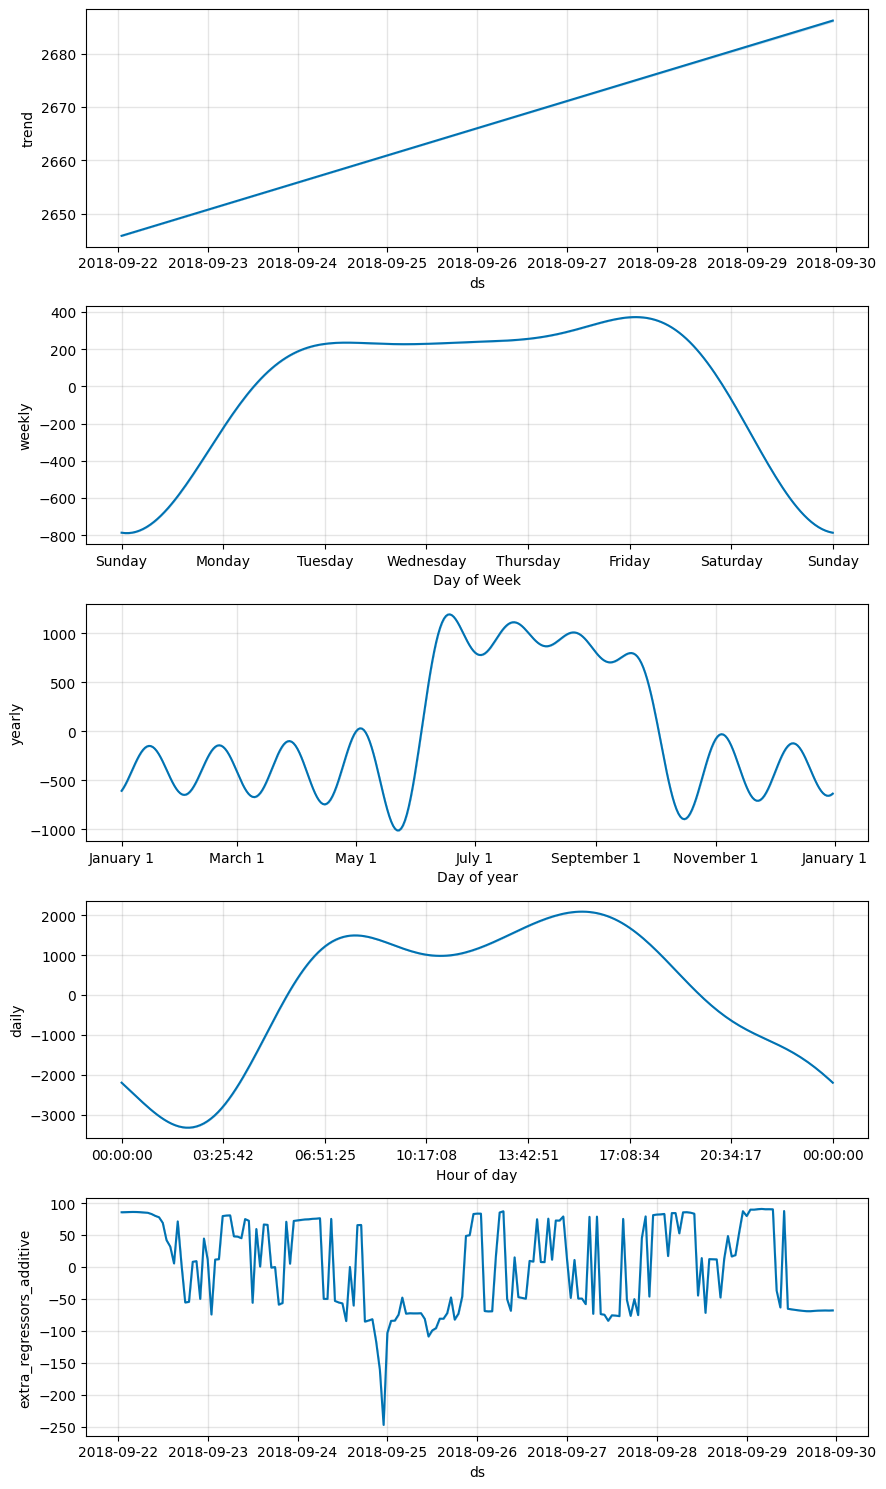

In [31]:
fig2 = model_reg.plot_components(y_pred_mr)

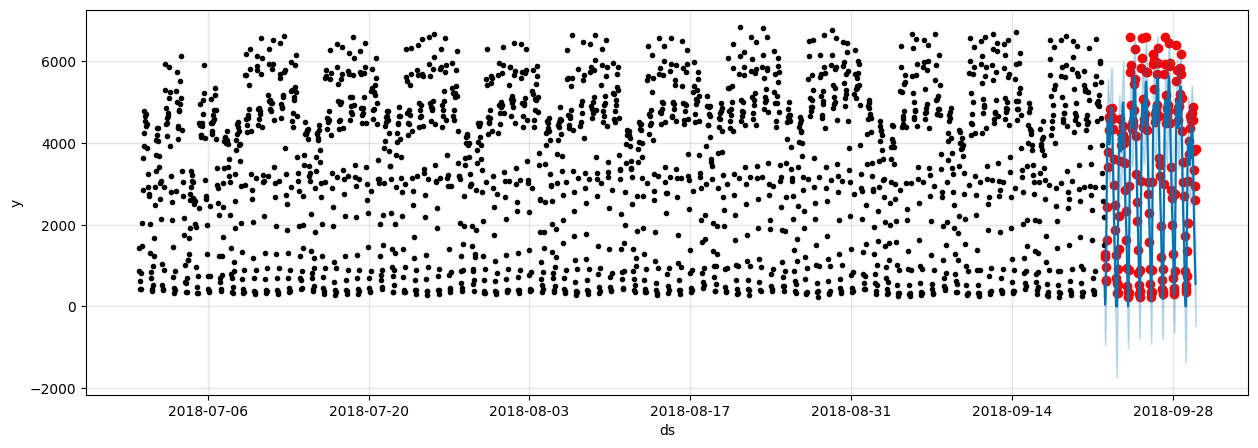

In [29]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig2 = model_with_temp.plot(y_pred_mr, ax=ax)

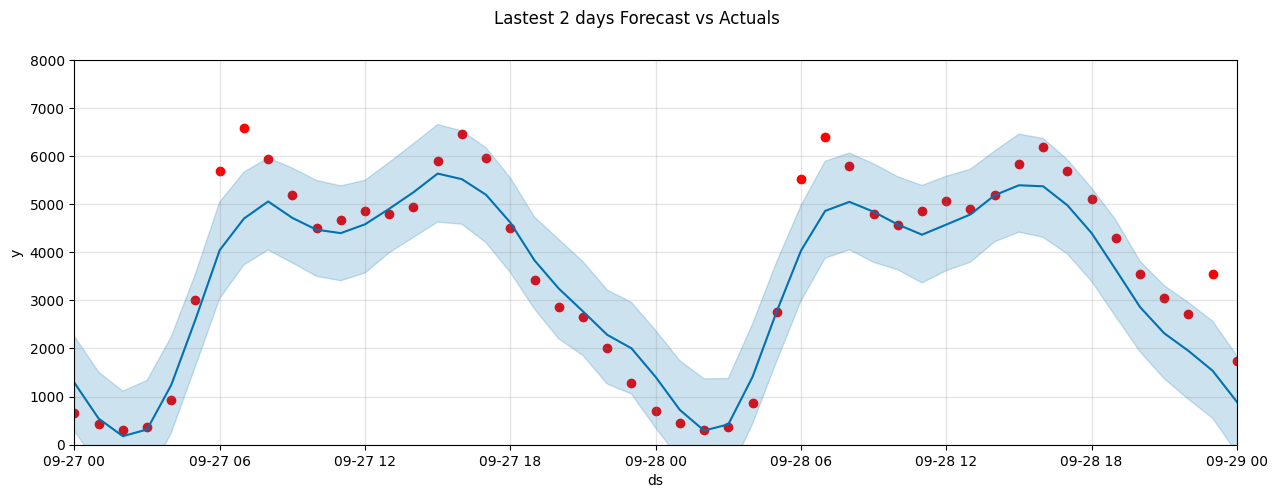

In [32]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig = model.plot(y_pred_mr, ax=ax)
ax.set_xbound(lower= datetime.date(2018,9,27), upper=datetime.date(2018,9,29))

ax.set_ylim(0, 8000)
plot = plt.suptitle('Lastest 2 days Forecast vs Actuals')

In [33]:
error_metrics(ts_test.y, y_pred_mr['yhat'])

Mean Absolute Error: 648.55
Root Mean Squared Error: 871.52
Mean Absolute percentage Error: 34.50 %


In [35]:
ts_train['cap'] = 8000
ts_train['floor'] = 0
ts_test['cap'] = 8000
ts_test['floor'] = 0

In [36]:
%%time
# Setup and train model
model = Prophet(growth='linear',
                #holidays=holidays,
                seasonality_mode= 'additive',
                changepoint_prior_scale=10,
                seasonality_prior_scale=0.01,
                #holidays_prior_scale=20,
                daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False
               ).add_seasonality(name = 'monthly', period = 30.5, fourier_order=20
               ).add_seasonality(name= 'daily', period= 1, fourier_order= 12
               ).add_seasonality(name= 'weekly', period= 7, fourier_order= 24)
model.add_regressor('temp')
model.add_regressor('rain_1h')
model.add_regressor('snow_1h')
model.add_regressor('clouds_all')

model.fit(ts_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o7vltkr/wu44hga9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o7vltkr/l83ithl0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39849', 'data', 'file=/tmp/tmp0o7vltkr/wu44hga9.json', 'init=/tmp/tmp0o7vltkr/l83ithl0.json', 'output', 'file=/tmp/tmp0o7vltkr/prophet_model_jyaxiyg/prophet_model-20240408114119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:41:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 692 ms, sys: 27.5 ms, total: 720 ms
Wall time: 4.6 s


In [37]:
%%time
# Predict on training set with model
y_pred_op = model.predict(df=ts_test)
y_pred_op.yhat[y_pred_op.yhat < 0] = 0

CPU times: user 184 ms, sys: 88.9 ms, total: 273 ms
Wall time: 319 ms


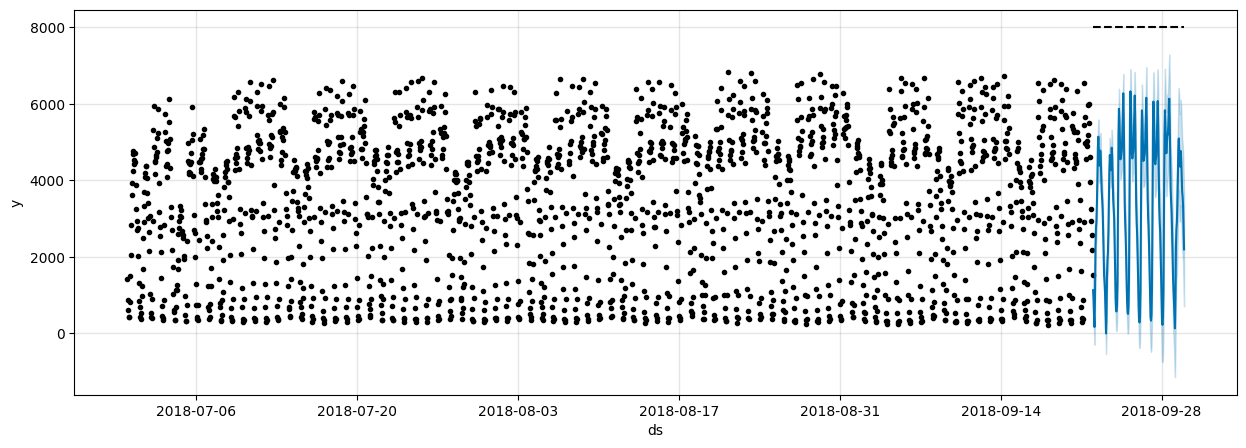

In [38]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(y_pred_op, ax=ax)

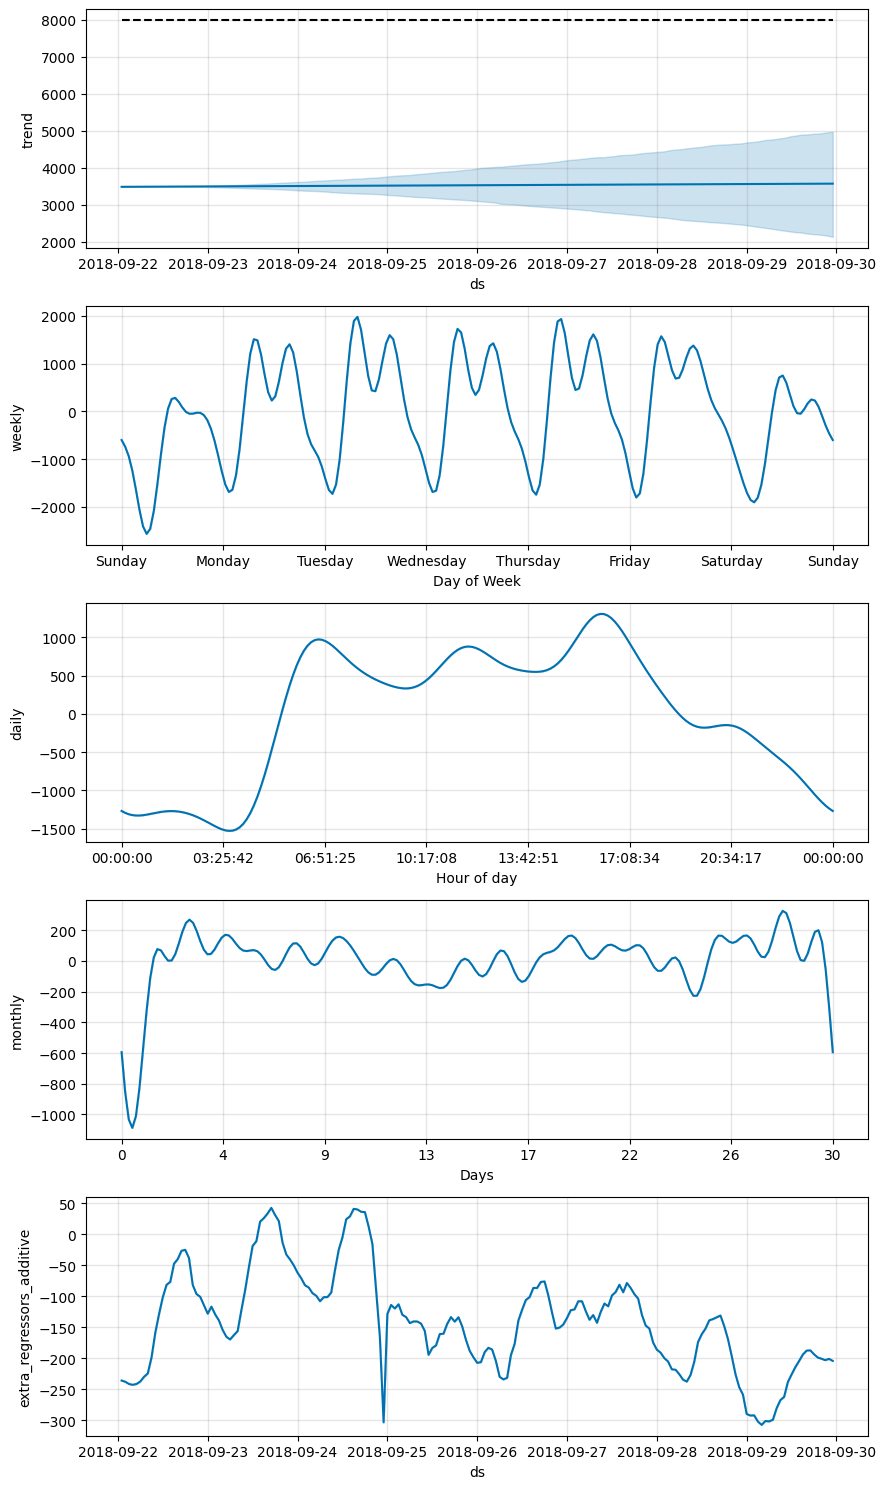

In [39]:
# Plot the components
fig = model.plot_components(y_pred_op)

In [ ]:
### Optimizing the model
# ref : https://towardsdatascience.com/implementing-facebook-prophet-efficiently-c241305405a3

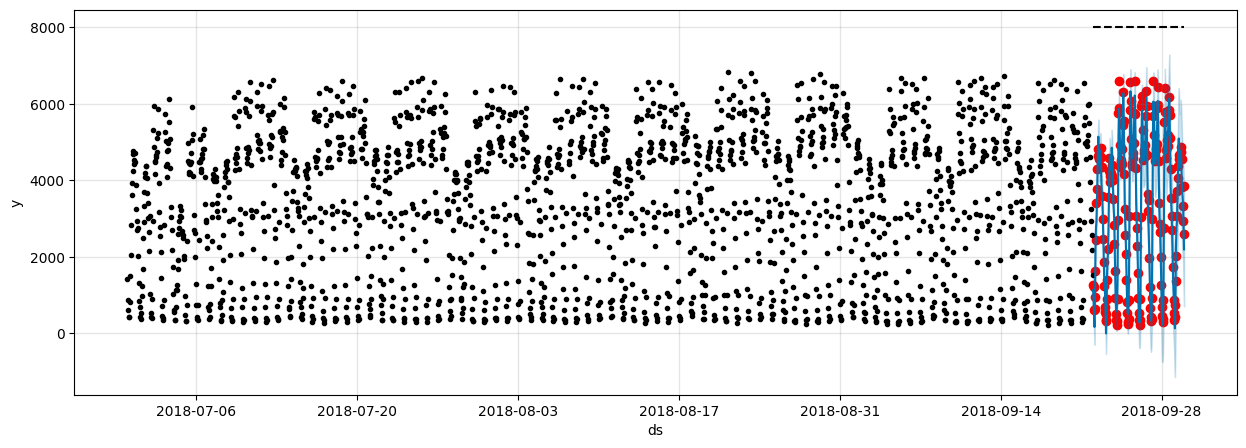

In [40]:
#### Compare Forecast to Actuals

# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig = model.plot(y_pred_op, ax=ax)

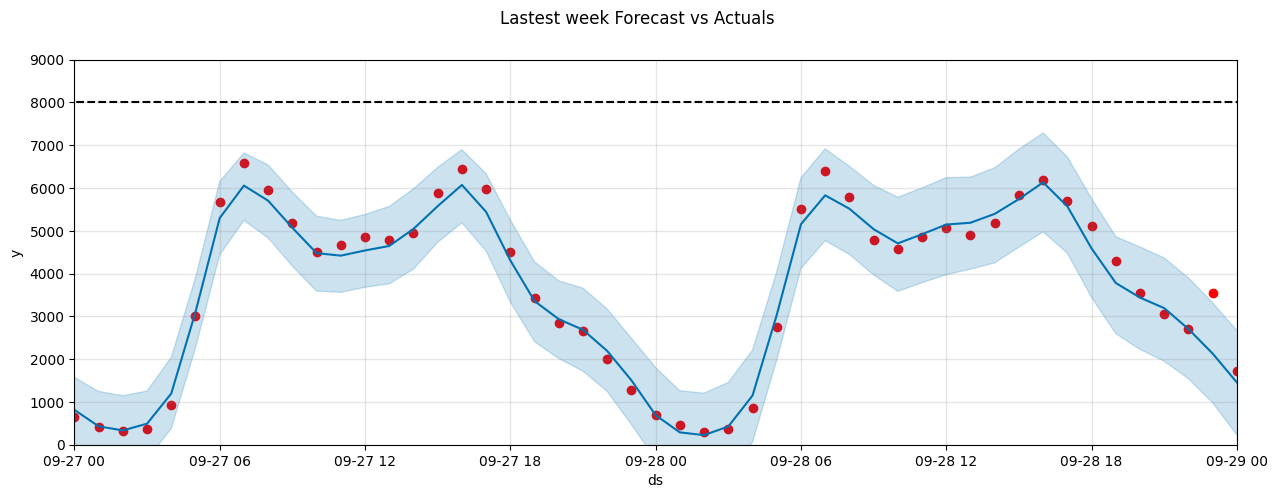

In [41]:
#Lastest week predictions

# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(ts_test.index, ts_test.y, color='r')
fig = model.plot(y_pred_op, ax=ax)
ax.set_xbound(lower= datetime.date(2018,9,27), upper=datetime.date(2018,9,29))

ax.set_ylim(0, 9000)
plot = plt.suptitle('Lastest week Forecast vs Actuals')

In [42]:
error_metrics(ts_test.y, y_pred_op['yhat'])

Mean Absolute Error: 292.38
Root Mean Squared Error: 379.44
Mean Absolute percentage Error: 18.32 %


In [43]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [48]:
# Initialize space or a required range of values
space={#'growth': hp.choice("growth", ['linear','logistic']),
        #'seasonality_mode': hp.uniform ('gamma', 1,9),
        'changepoint_prior_scale' : hp.uniform('changepoint_prior_scale', 8,12),
        #'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        #'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        #'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        #'subsample' : hp.quniform('subsample', 0.6, 1, 0.05),
        #'n_estimators': hp.uniform('n_estimators', 500, 1000)
    }

In [44]:
# Define objective function
def hyperparameter_tuning(space):
    model = Prophet(growth='linear',
                #holidays=holidays,
                seasonality_mode= 'additive',
                changepoint_prior_scale= space['changepoint_prior_scale'],
                seasonality_prior_scale=0.01,
                #holidays_prior_scale=20,
                daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False
               ).add_seasonality(name = 'monthly', period = 30.5, fourier_order=20
               ).add_seasonality(name= 'daily', period= 1, fourier_order= 12
               ).add_seasonality(name= 'weekly', period= 7, fourier_order= 24)
    #model.add_regressor('temp')
    #model.add_regressor('rain_1h')
    #model.add_regressor('snow_1h')
    #model.add_regressor('clouds_all')

    model.fit(ts_train)

    y_pred_op = model.predict(df=ts_test)
    y_pred_op.yhat[y_pred_op.yhat < 0] = 0

    score = mean_absolute_percentage_error(ts_test.y, y_pred_op['yhat'])
    return {'loss':score, 'status': STATUS_OK, 'model': model}

In [45]:
trials = Trials()

In [49]:
%%time
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=2,
            trials=trials)

  0%|          | 0/2 [00:00<?, ?trial/s, best loss=?]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o7vltkr/460ro1k0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o7vltkr/wupwr2z9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85935', 'data', 'file=/tmp/tmp0o7vltkr/460ro1k0.json', 'init=/tmp/tmp0o7vltkr/wupwr2z9.json', 'output', 'file=/tmp/tmp0o7vltkr/prophet_modelhcb9lu2c/prophet_model-20240408114436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:44:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:44:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 50%|█████     | 1/2 [00:03<00:03,  3.35s/trial, best loss: 19.608564784522382]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o7vltkr/fwl2_97y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o7vltkr/4x1l6vpv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91207', 'data', 'file=/tmp/tmp0o7vltkr/fwl2_97y.json', 'init=/tmp/tmp0o7vltkr/4x1l6vpv.json', 'output', 'file=/tmp/tmp0o7vltkr/prophet_modelni4jl2hz/prophet_model-20240408114439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:44:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:44:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


100%|██████████| 2/2 [00:07<00:00,  3.68s/trial, best loss: 19.03073557259233]
CPU times: user 1.6 s, sys: 288 ms, total: 1.89 s
Wall time: 7.38 s


In [50]:
print (best)

{'changepoint_prior_scale': 11.254557807053}
